## 최신 기출동형 모의고사 - 제3회 기출동형 모의고사
### 1. 머신러닝 (50점)

#### (1) 데이터를 탐색하고 탐색 결과를 제시하시오.
    1. 데이터를 임포트하여 메모리에 올린다.
    2. 데이터의 모양을 확인 한다.
    3. 데이터의 타입을 확인한다.
    4. 데이터의 Null 값을 체크한다. 
    5. 종속변수의 분포를 살펴본다.
    6. 독립변수 - 명목형 변수의 분포를 살펴본다. 
    7. 독립변수 - 수치형 변수의 분포를 살펴본다. 
    8. 수치형, 명목형 변수간의 관계를 파악한다. 
    [ref1](https://www.kaggle.com/code/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations)
    ref2 https://dacon.io/codeshare/4899
    ref3 https://dev-mystory.tistory.com/230

In [1]:
import pandas as pd
import urllib.request
from urllib.parse import quote
from io import StringIO

url1 = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/hotel_bookings.csv'
encoded_url1 = quote(url1, safe=':/')

response1 = urllib.request.urlopen(encoded_url1)
hotel = pd.read_csv(StringIO(response1.read().decode('utf-8')))
hotel

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
hotel.info() # missing values: is_repeated_guest, adr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [4]:
# categorical features: is_canceled, deposit_type(map/factorize), is_repeated_guest(q: int float?)
# abnormal: min(adr)
# range: should scale
hotel.describe(include="all")

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.00000,20000,19995.000000,20000.000000,20000.000000,19642.000000,20000.000000,20000.000000,20000.000000,20000.000000,18937.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No Deposit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,19138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.12000,NaN,85.978345,0.892550,2.380400,0.038133,0.032900,0.169050,0.269400,1.983950,101.410239
std,0.32497,NaN,96.427240,0.952077,1.777345,0.191521,0.455552,1.502426,0.687566,15.927212,49.245097
min,0.00000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.00000,NaN,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.800000
50%,0.00000,NaN,51.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000
75%,0.00000,NaN,132.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000


In [5]:
hotel.is_repeated_guest.value_counts()

0.0    18893
1.0      749
Name: is_repeated_guest, dtype: int64

In [6]:
hotel.deposit_type.value_counts()

No Deposit    19138
Non Refund      834
Refundable       28
Name: deposit_type, dtype: int64

In [8]:
hotel.is_canceled.value_counts()

0    17600
1     2400
Name: is_canceled, dtype: int64

In [9]:
# nominal variable to object, extract and make a list
df_new = hotel
df_new.deposit_type = hotel.deposit_type.map({"No Deposit" : 0, "Non Refund" : 1, "Refundable" : 2})
print(df_new.deposit_type.dtype)

int64


In [10]:
hotel.deposit_type.value_counts()

0    19138
1      834
2       28
Name: deposit_type, dtype: int64

In [20]:
#categorical_features = [col for col in df_new.columns if df_new[col].dtype == object]
#categorical_features

In [21]:
#categorical_features = categorical_features[1:]
#categorical_features

In [11]:
df_new[df_new.is_canceled == 1]['deposit_type'].value_counts()

0    1586
1     814
Name: deposit_type, dtype: int64

In [12]:
df_new[df_new.is_canceled == 0]['deposit_type'].value_counts()

0    17552
2       28
1       20
Name: deposit_type, dtype: int64

In [13]:
def bar_chart(feature):
    canceled = df_new[df_new.is_canceled == 1][feature].value_counts()
    not_canceled = df_new[df_new.is_canceled == 0][feature].value_counts()
    
    df1 = pd.DataFrame([canceled, not_canceled])
    df1.index = ['canceled', 'not_canceled']
    df1.plot(kind='bar', stacked=True, figsize=(5,2))

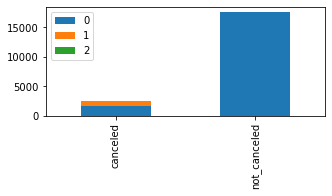

In [14]:
bar_chart('deposit_type')

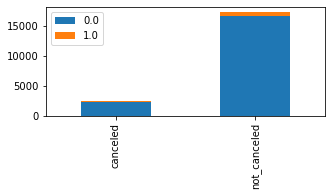

In [15]:
bar_chart('is_repeated_guest')

In [31]:
target = ['is_canceled']
categorical_features = ['deposit_type', 'is_repeated_guest']

In [32]:
# exploring numerical data
numerical_features = list(set(df_new.columns) - set(categorical_features) - set(target))
numerical_features

['previous_bookings_not_canceled',
 'previous_cancellations',
 'days_in_waiting_list',
 'stays_in_week_nights',
 'stays_in_weekend_nights',
 'booking_changes',
 'adr',
 'lead_time']

<AxesSubplot:>

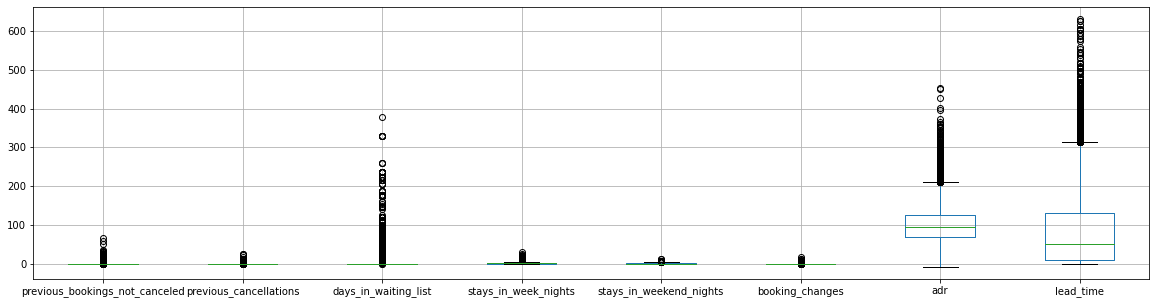

In [36]:
df_new.boxplot(numerical_features, figsize=(20, 5))

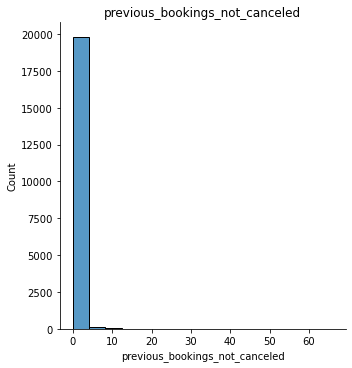

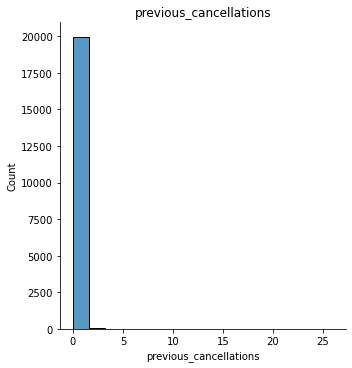

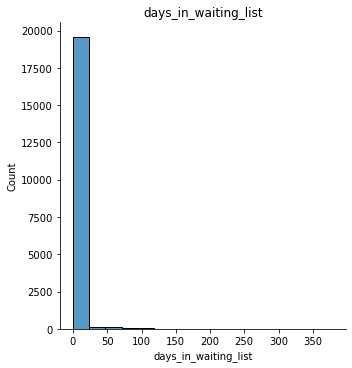

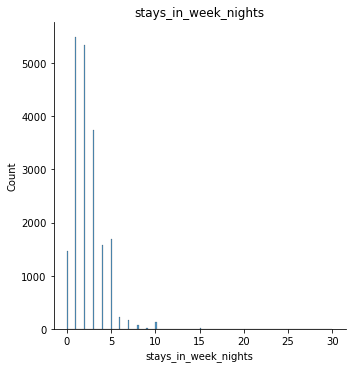

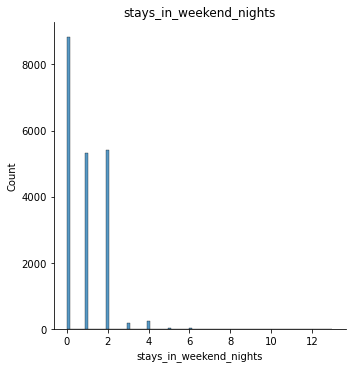

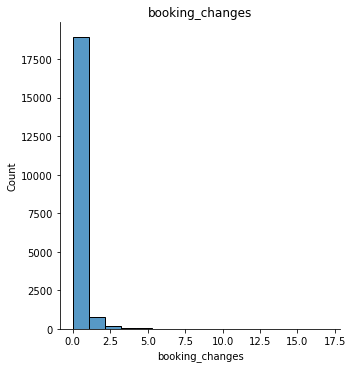

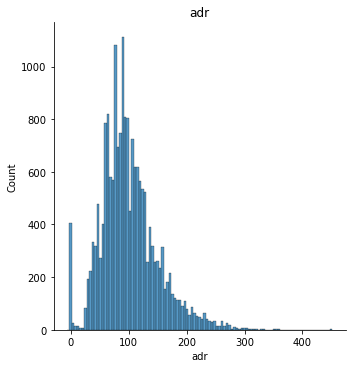

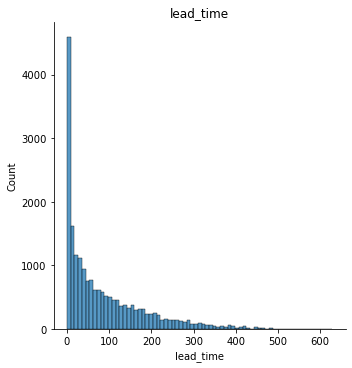

In [37]:
for col in numerical_features:
    sns.displot(df_new.loc[df_new[col].notnull(), col])
    plt.title(col)

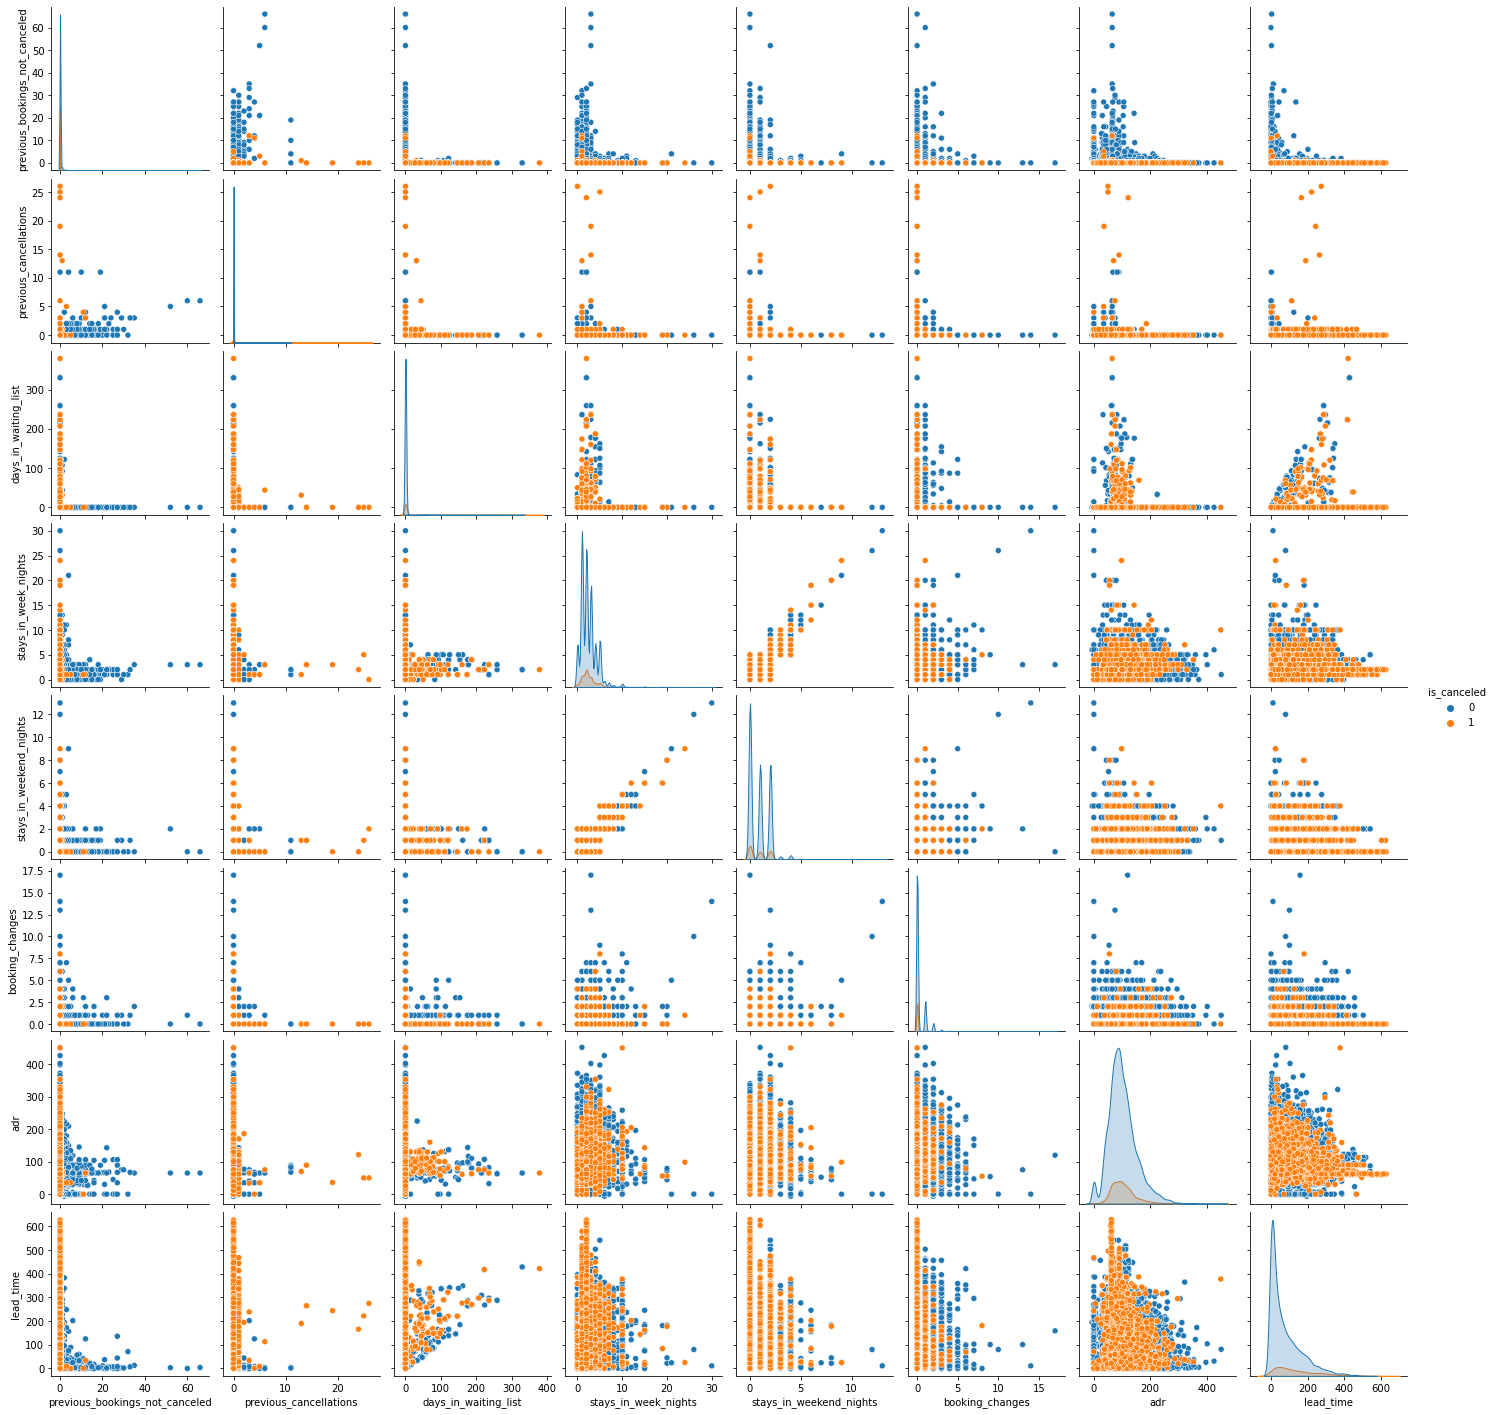

In [39]:
sns.pairplot(df_new[numerical_features + target], hue='is_canceled', 
             x_vars=numerical_features, y_vars=numerical_features)
plt.show()

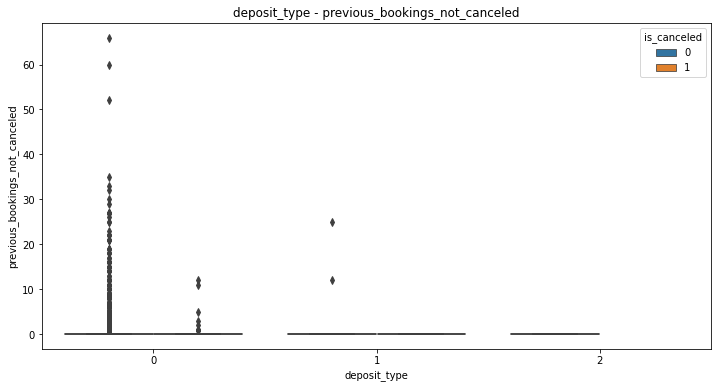

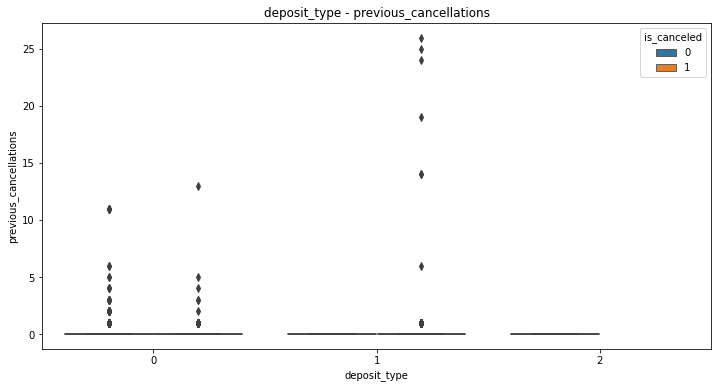

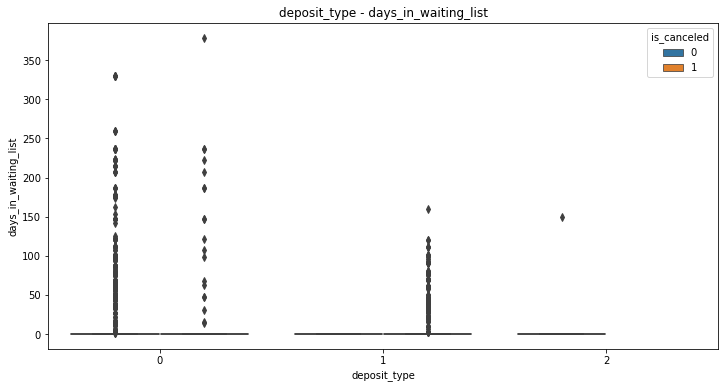

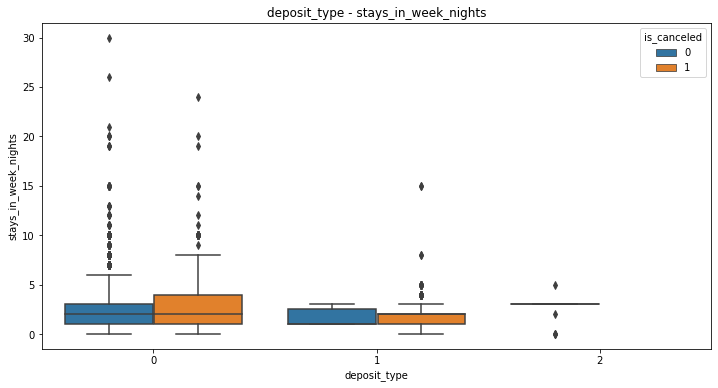

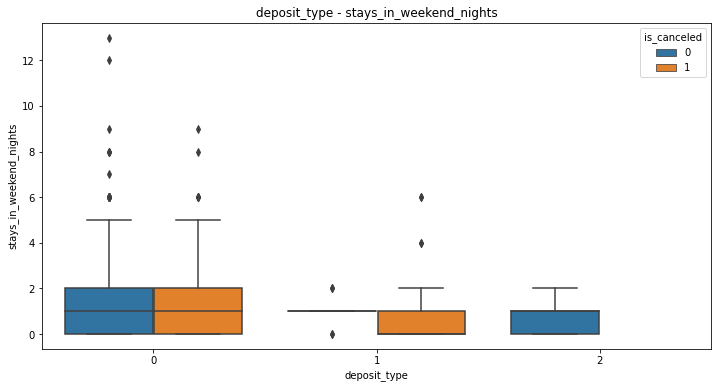

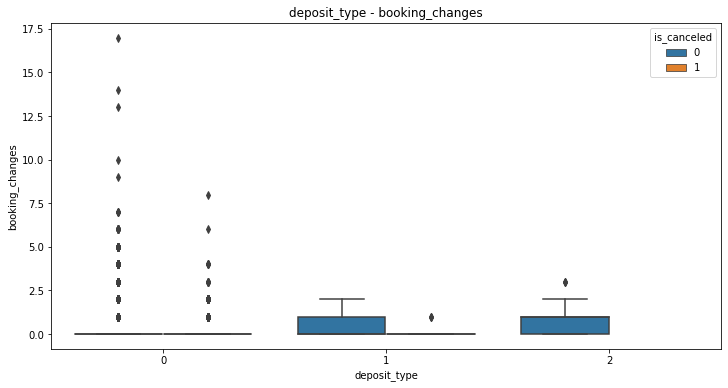

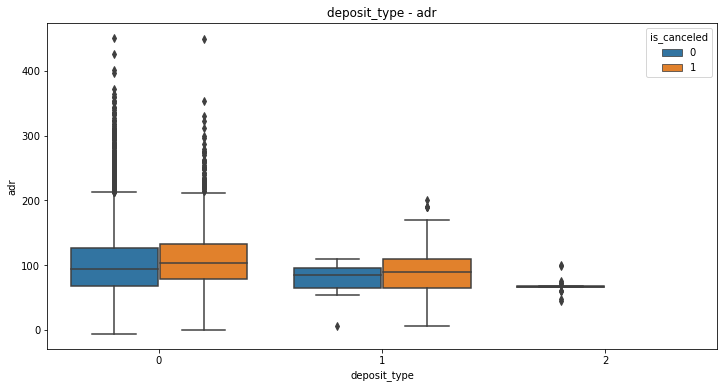

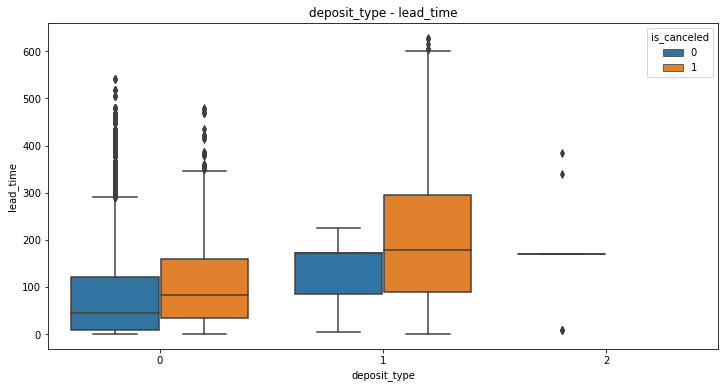

In [40]:
unique_list = df_new['deposit_type'].unique()
 
for col in numerical_features:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='deposit_type', y=col, hue='is_canceled', data=df_new.dropna())
    plt.title("deposit_type - {}".format(col))
    plt.show()

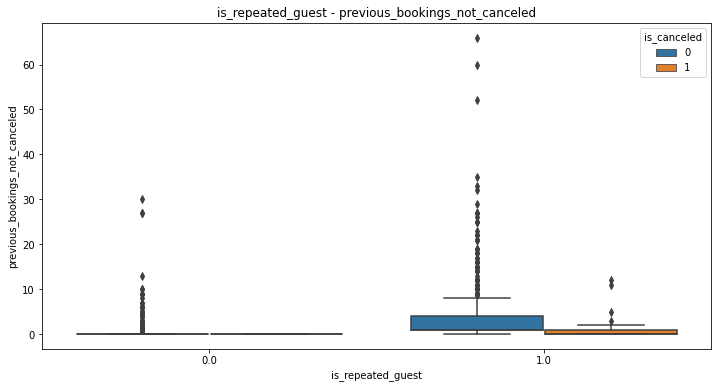

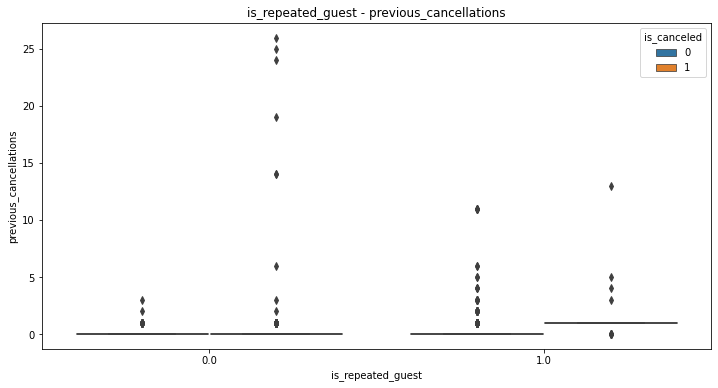

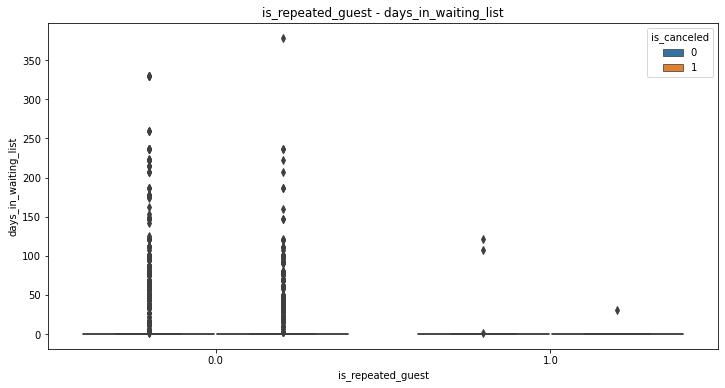

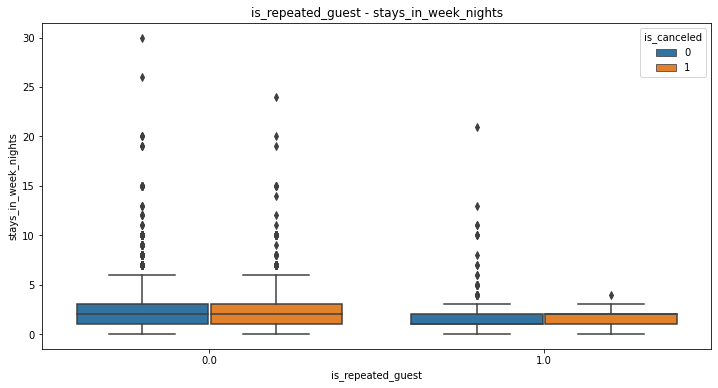

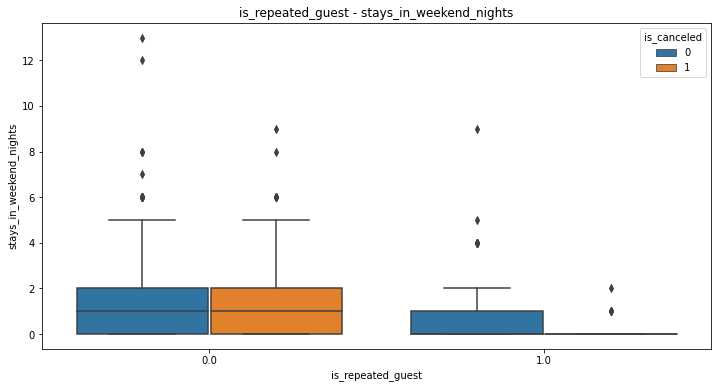

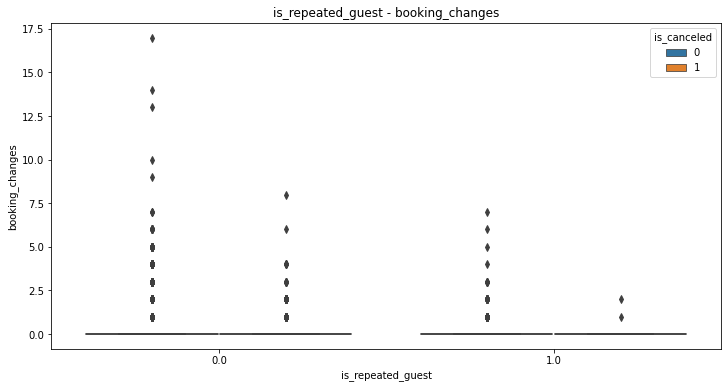

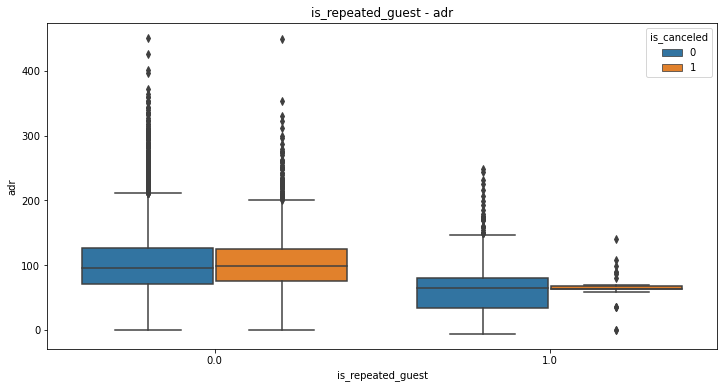

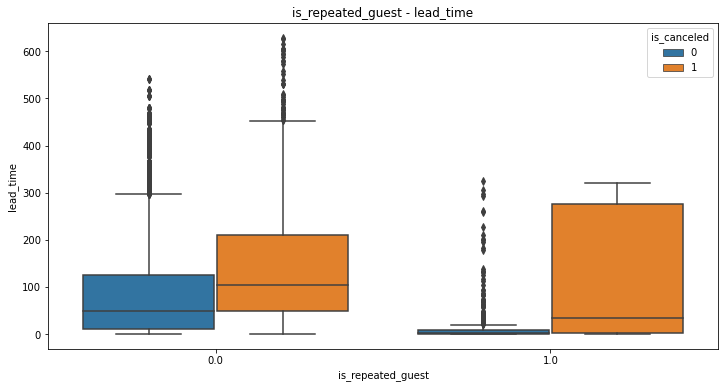

In [41]:
unique_list = df_new['is_repeated_guest'].unique()
 
for col in numerical_features:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='is_repeated_guest', y=col, hue='is_canceled', data=df_new.dropna())
    plt.title("is_repeated_guest - {}".format(col))
    plt.show()

In [83]:
# deposit_time, lead_time, previous_cancellations, booking_changes are important numerical features
cancel_corr = hotel.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

deposit_type                      0.511136
lead_time                         0.212232
previous_cancellations            0.117892
booking_changes                   0.094563
is_repeated_guest                 0.047347
days_in_waiting_list              0.041913
previous_bookings_not_canceled    0.037557
stays_in_week_nights              0.029438
adr                               0.020641
stays_in_weekend_nights           0.010809
Name: is_canceled, dtype: float64

#### (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

In [42]:
df_new.isnull().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [49]:
missing = df_new.isnull().sum().reset_index()
missing.columns = ['columns', 'count']
missing['ratio'] = missing['count'] / df_new.shape[0]
missing_df = pd.DataFrame(missing.loc[missing['ratio']!=0])
missing_df

,columns,count,ratio
2,lead_time,5,0.00025
5,is_repeated_guest,358,0.01790
10,adr,1063,0.05315


In [78]:
df_new = df_new.dropna(axis=0)

In [79]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18593 entries, 3 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     18593 non-null  int64  
 1   deposit_type                    18593 non-null  int64  
 2   lead_time                       18593 non-null  float64
 3   stays_in_weekend_nights         18593 non-null  int64  
 4   stays_in_week_nights            18593 non-null  int64  
 5   is_repeated_guest               18593 non-null  float64
 6   previous_cancellations          18593 non-null  int64  
 7   previous_bookings_not_canceled  18593 non-null  int64  
 8   booking_changes                 18593 non-null  int64  
 9   days_in_waiting_list            18593 non-null  int64  
 10  adr                             18593 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 1.7 MB


In [80]:
ps = hotel.shape[0]
cs= df_new.shape[0]
print(f'Items removed: {ps-cs}, {100-cs/ps*100:.2f}%')

Items removed: 1407, 7.03%


#### (3) 데이터 질을 향상시킬 수 있는 방법을 제안하시오

In [32]:
import scipy.stats as ss

In [33]:
def find_skew(col_name):
    r = ss.skew(df_new[col_name])
    return r

In [34]:
for i in range(len(numerical_features)):
    print(f'skewness of {numerical_features[i]}: {find_skew(numerical_features[i]):.2f}')

skewness of previous_cancellations: 36.13
skewness of days_in_waiting_list: 11.21
skewness of stays_in_week_nights: 2.24
skewness of lead_time: 1.53
skewness of booking_changes: 4.80
skewness of adr: 0.97
skewness of previous_bookings_not_canceled: 18.96
skewness of stays_in_weekend_nights: 1.13


In [117]:
df_final = df_new.copy()

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_final[numerical_features] = scaler.fit_transform(df_new[numerical_features])

C:\Users\Devin\anaconda3\envs\tf2_py39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [38]:
df_final.describe()

,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000,18593.000000
mean,0.043887,0.136984,0.068624,0.079612,0.001293,0.002556,0.015863,0.005270,0.235458
std,0.211312,0.153229,0.073386,0.059340,0.018084,0.022922,0.040405,0.042499,0.107421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.017488,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.164628
50%,0.000000,0.081081,0.076923,0.066667,0.000000,0.000000,0.000000,0.000000,0.220516
75%,0.000000,0.209857,0.153846,0.100000,0.000000,0.000000,0.000000,0.000000,0.289115
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# stays in weekend / week nights?

#### (4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.

In [40]:
class_name = df_final.columns[0]
num_class = len(df_final["is_canceled"])
num_class_zero = df_final["is_canceled"].value_counts()[0]
num_class_one = df_final["is_canceled"].value_counts()[1]

print(f'Class 0 in column {class_name}: {num_class_zero}, {num_class_zero /num_class * 100:.2f}%')
print(f'Class 1 in column {class_name}: {num_class_one}, {num_class_one/num_class*100:.2f}%')

Class 0 in column is_canceled: 16360, 87.99%
Class 1 in column is_canceled: 2233, 12.01%


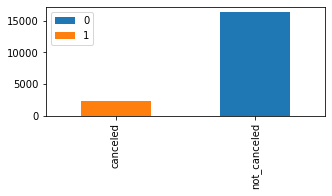

In [41]:
bar_chart("is_canceled")

### (5) 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오.

 - https://github.com/scikit-learn-contrib/imbalanced-learn
 - https://pgh95319.tistory.com/13

In [42]:
df_final['is_canceled'] = df_final['is_canceled'].astype(int)

C:\Users\Devin\AppData\Local\Temp/ipykernel_41568/1660780487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['is_canceled'] = df_final['is_canceled'].astype(int)


In [43]:
type(df_final['is_canceled'])

pandas.core.series.Series

In [44]:
# naive random oversampling
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(df_final, df_final['is_canceled'])

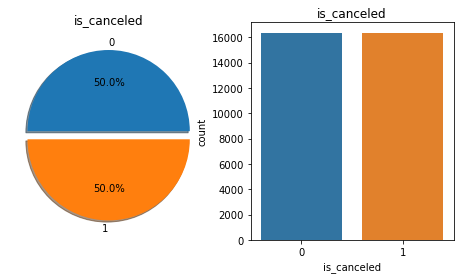

In [45]:
f,ax=plt.subplots(1,2,figsize=(8,4)) # 파이 그래프
y_over.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('is_canceled')
ax[0].set_ylabel('')

sns.countplot(x=y_over,ax=ax[1]) # 빈도 그래프
ax[1].set_title('is_canceled')
plt.show()

In [46]:
print(df_final.shape[0])
print(x_over.shape)
print(x_over.shape[0] / 2)

18593
(32720, 11)
16360.0


In [47]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='minority')
x_over_smote, y_over_smote = oversample.fit_resample(df_final, df_final['is_canceled'])

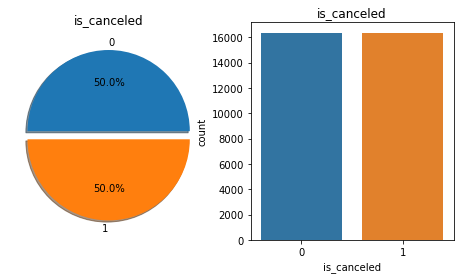

In [48]:
f,ax=plt.subplots(1,2,figsize=(8,4)) # 파이 그래프
y_over.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('is_canceled')
ax[0].set_ylabel('')

sns.countplot(x=y_over_smote,ax=ax[1]) # 빈도 그래프
ax[1].set_title('is_canceled')
plt.show()

In [49]:
print(df_final.shape[0])
print(x_over_smote.shape)
print(x_over_smote.shape[0] / 2)

18593
(32720, 11)
16360.0


#### (6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

#### (7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

In [50]:
# for ML:
import xgboost
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import eli5 # Feature importance evaluation

#### prepare data

In [51]:
print(numerical_features)
print(categorical_features)

['previous_cancellations', 'days_in_waiting_list', 'stays_in_week_nights', 'lead_time', 'booking_changes', 'adr', 'previous_bookings_not_canceled', 'stays_in_weekend_nights']
['deposit_type', 'is_repeated_guest']


In [66]:
# manually choose columns to include
# some columns are excluded to make the model more general and to prevent leakage
# (arrival_date_year, assigned_room_type, booking_changes, reservation_status, country,
# days_in_waiting_list)
# including the country would increase accuracy, but it may also make the model less general

num_features = ["lead_time", "previous_cancellations", "booking_changes",
                "days_in_waiting_list", "previous_bookings_not_canceled",
                "stays_in_weekend_nights","stays_in_week_nights", "adr", "is_repeated_guest"]

cat_features = ["deposit_type"]

# Separate features and predicted value
features = num_features + cat_features
X = hotel.drop(["is_canceled"], axis=1)[features]
y = hotel["is_canceled"]

# preprocess numerical feats:
# for most num cols, except the dates, 0 is the most logical choice as fill value
# and here no dates are missing.
num_transformer = SimpleImputer(strategy="constant")

# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

#### define models to test

In [67]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [68]:
# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    # pack preprocessing of data and the model in a pipeline:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    # get cross validation score for each model:
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    # output:
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")
    
    #pipeline.fit(X_train, y_train)
    #preds = pipeline.predict(X_valid)
    #score = accuracy_score(y_valid, preds)
    #print(f"{name} accuracy_score: {round(score, 4)}")

DT_model cross validation accuarcy score: 0.8717 +/- 0.0041 (std) min: 0.8668, max: 0.8768
RF_model cross validation accuarcy score: 0.9193 +/- 0.0044 (std) min: 0.912, max: 0.9234
LR_model cross validation accuarcy score: 0.9202 +/- 0.0043 (std) min: 0.9128, max: 0.9236
XGB_model cross validation accuarcy score: 0.9233 +/- 0.0049 (std) min: 0.9148, max: 0.927


### (8) 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.

In [73]:
# naive random oversampling
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(hotel, hotel['is_canceled'])

In [74]:
features = num_features + cat_features
X = x_over.drop(["is_canceled"], axis=1)[features]
y = x_over["is_canceled"]

# preprocess numerical feats:
# for most num cols, except the dates, 0 is the most logical choice as fill value
# and here no dates are missing.
num_transformer = SimpleImputer(strategy="constant")

# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [75]:
# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    # pack preprocessing of data and the model in a pipeline:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    # get cross validation score for each model:
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    # output:
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")
    
    #pipeline.fit(X_train, y_train)
    #preds = pipeline.predict(X_valid)
    #score = accuracy_score(y_valid, preds)
    #print(f"{name} accuracy_score: {round(score, 4)}")

DT_model cross validation accuarcy score: 0.9475 +/- 0.0021 (std) min: 0.9448, max: 0.9503
RF_model cross validation accuarcy score: 0.9655 +/- 0.0012 (std) min: 0.9641, max: 0.9673
LR_model cross validation accuarcy score: 0.7016 +/- 0.003 (std) min: 0.6965, max: 0.7041
XGB_model cross validation accuarcy score: 0.8459 +/- 0.0065 (std) min: 0.8375, max: 0.8532


### 2. 통계분석 (50점)

#### 1. 공장에서는 시제품의 농도(%)가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.

In [76]:
x =[52 ,50 ,62 ,75 ,26 ,45 ,62 ,35 ,57 ,14 ]

### (1) 연구가설, 귀무가설을 작성하시오.
- h0: 농도의 차이가 없다 (같다)
- h1: 농도의 차이가 있다

### (2) 유효한 샘플의 수를 계산하시오.
 1. 검정력 분석??
    - R: power.t.test(n=20,delta=40,sd=50,sig.level=0.05,type= "one.sample",alternative="one.sided") 
    - Python : import statsmodels.stats.power as smp smp.ttest_power(0.8, nobs=20, alpha=0.05, alternative='larger')
 2. ??
    - 문제의 의도를 잘 파악 못 했습니다. 무턱대고 R에서 wilcoxon sign test 쓰려고 하니까 에러 뜨길래 median과 동일한 데이터 2개 제거했더니 됐습니다. 그래서 12개 - 2개 = 10개라고 했습니다.
찾아보니 median과 동일한 데이터를 제거하는게 맞네요

### (3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.

In [100]:
# 표본수 30개 미만 정규성검정 해야함
# 정규성 검정이 기각되면 비모수적 방법인 윌콕슨 순위합검정 해야함
# 샘플 사이즈가 너무 작을 경우 정규성 검정 할수 없음

In [101]:
from scipy import stats
from scipy.stats import shapiro
mu = 60

In [102]:
print(shapiro(x)) # pvalue > 0.05: h0 정규분포이다 if not wilcoxon rank test
print(len(x)-1)

ShapiroResult(statistic=0.9657644629478455, pvalue=0.8490405082702637)
9


In [103]:
stats, pvalue = stats.ttest_1samp(x, mu)
pvalue
print(f"p-value는 {pvalue:.3f}로 유의수준인 0.05보다 크므로 귀무가설 채택. 동일하다.")

p-value는 0.065로 유의수준인 0.05보다 크므로 귀무가설 채택. 동일하다.


#### 2. 코로나 시계열 데이터로 다음을 수행하시오.

In [118]:
import pandas as pd
import urllib.request
from urllib.parse import quote
from io import StringIO

url2 = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/서울특별시 코로나19.csv'
encoded_url2 = quote(url2, safe=':/')

response2 = urllib.request.urlopen(encoded_url2)
covid = pd.read_csv(StringIO(response2.read().decode('utf-8')))
covid

,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2020-02-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,2020-02-06,3,0,0,0,0,0,1,2,0,...,1,0,0,0,0,0,0,0,1,0


### (1) ACF를 사용해서 distance를 계산하시오

- https://it-freelancer.tistory.com/18
- https://www.datamanim.com/dataset/ADPpb/00/p1.html

In [155]:
df_covid = covid.drop('날짜', axis=1)
df_covid.columns

Index(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype='object')

In [156]:
df_new = df_covid.cumsum()

In [158]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종로구     785 non-null    int64
 1   중구      785 non-null    int64
 2   용산구     785 non-null    int64
 3   성동구     785 non-null    int64
 4   광진구     785 non-null    int64
 5   동대문구    785 non-null    int64
 6   중랑구     785 non-null    int64
 7   성북구     785 non-null    int64
 8   강북구     785 non-null    int64
 9   도봉구     785 non-null    int64
 10  노원구     785 non-null    int64
 11  은평구     785 non-null    int64
 12  서대문구    785 non-null    int64
 13  마포구     785 non-null    int64
 14  양천구     785 non-null    int64
 15  강서구     785 non-null    int64
 16  구로구     785 non-null    int64
 17  금천구     785 non-null    int64
 18  영등포구    785 non-null    int64
 19  동작구     785 non-null    int64
 20  관악구     785 non-null    int64
 21  서초구     785 non-null    int64
 22  강남구     785 non-null    int64
 23  송파구     785 non

In [159]:
from scipy.spatial import distance
import statsmodels.api as sm
import numpy as np
name =[]
for location in df_new.columns:
    
    v = sm.tsa.stattools.acf(df_new[i], nlags=50, fft=False)
    name.append([location]+list(v[1:]))

v = pd.DataFrame(name)

In [160]:
v

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,종로구,0.978022,0.956797,0.936313,0.916566,0.897543,0.879219,0.861588,0.844628,0.828302,...,0.531553,0.526254,0.521059,0.515955,0.51094,0.50601,0.501159,0.496381,0.491672,0.487023
1,중구,0.978022,0.956797,0.936313,0.916566,0.897543,0.879219,0.861588,0.844628,0.828302,...,0.531553,0.526254,0.521059,0.515955,0.51094,0.50601,0.501159,0.496381,0.491672,0.487023
2,용산구,0.978022,0.956797,0.936313,0.916566,0.897543,0.879219,0.861588,0.844628,0.828302,...,0.531553,0.526254,0.521059,0.515955,0.51094,0.50601,0.501159,0.496381,0.491672,0.487023
3,성동구,0.978022,0.956797,0.936313,0.916566,0.897543,0.879219,0.861588,0.844628,0.828302,...,0.531553,0.526254,0.521059,0.515955,0.51094,0.50601,0.501159,0.496381,0.491672,0.487023
4,광진구,0.978022,0.956797,0.936313,0.916566,0.897543,0.879219,0.861588,0.844628,0.828302,...,0.531553,0.526254,0.521059,0.515955,0.51094,0.50601,0.501159,0.496381,0.491672,0.487023
5,동대문구,0.978022,0.956797,0.936313,0.916566,0.897543,0.879219,0.861588,0.844628,0.828302,...,0.531553,0.526254,0.521059,0.515955,0.51094,0.50601,0.501159,0.496381,0.491672,0.487023
6,중랑구,0.978022,0.956797,0.936313,0.916566,0.897543,0.879219,0.861588,0.844628,0.828302,...,0.531553,0.526254,0.521059,0.515955,0.51094,0.50601,0.501159,0.496381,0.491672,0.487023
7,성북구,0.978022,0.956797,0.936313,0.916566,0.897543,0.879219,0.861588,0.844628,0.828302,...,0.531553,0.526254,0.521059,0.515955,0.51094,0.50601,0.501159,0.496381,0.491672,0.487023
8,강북구,0.978022,0.956797,0.936313,0.916566,0.897543,0.879219,0.861588,0.844628,0.828302,...,0.531553,0.526254,0.521059,0.515955,0.51094,0.50601,0.501159,0.496381,0.491672,0.487023
9,도봉구,0.978022,0.956797,0.936313,0.916566,0.897543,0.879219,0.861588,0.844628,0.828302,...,0.531553,0.526254,0.521059,0.515955,0.51094,0.50601,0.501159,0.496381,0.491672,0.487023


### (2) 계층적 군집 분석을 위해 덴드로그램을 작성하시오

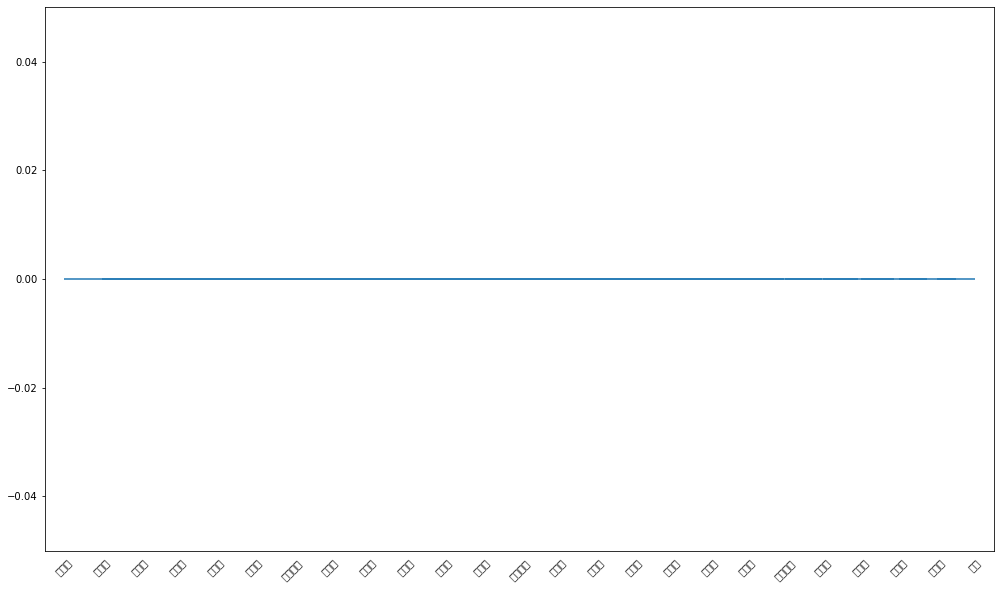

In [178]:
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


data =v.set_index(0)
label = np.array(data.index)

datav = data.values

fig = plt.figure(figsize=(17,10))

ax3 = fig.add_subplot(1,1,1)
dend3 = sch.linkage(datav, method='average', metric='euclidean')
cutoff = 0.3*max(dend3[:,2])
dend_res3 = sch.dendrogram(dend3, color_threshold=cutoff)
ax3.set_xticklabels(label[dend_res3['leaves']], minor=False)

plt.show()

#### 3. 사회과학, 자연과학, 공학 세 개 학과의 평점조사표를 보고 학과와 성적이 관계있는지 검정하시오.

In [104]:
사회 = [16, 30, 12]
자연 = [12, 20, 3]
공학 = [18, 13, 14]
table = pd.DataFrame({'사회과학': 사회,
                     '자연과학': 자연,
                     '공학': 공학},
                     index=['A', 'B', 'C'])
print (table)

   사회과학  자연과학  공학
A    16    12  18
B    30    20  13
C    12     3  14


### Correlation analysis

 - 상관계수를 활용하여 두 변수 사이의 통계적 관계 표현할 수 있으며 상관 계수는 다음과 같이 구분할 수 있음
  1) By linearily
     - Linear: Pearson's r
     - non-linear: Spearman's rho (rank)| Kendall's tau (rank)
  2) By data type
     - contineous-contineous (range: -1, 1)
         - Pearson: parametric, 자료간 상관관계
         - Spearman: non-parametric, rank, 한 자료 변수 증/감 따라 다른변수 증/감
         - Kendall: non-parametric, rank, 한 변수 증감/ 다른변수 증/감
     - categorical-categorical (range: 0, 1)
         - Phi correlation: 비교대상 범주대상 2개 (남/여, T/F)
         - Cramer's V: 비교대상 범주대상이 3개 이상 (10대/20대/30대, 단독/연립/아파트)
     - categorical-contineous
         - Point bi-serial correlation: categorical-cont. (성별-수학점수)
         - Biserial correlation: nominal(2분변수)-cont. (SKY반 편성여부-중간점수)
         - Polyserial correlation: nominal(3분변수)-cont. (인종-키)

 - 두 변수의 자료형은 사회/자현/공학 및 A/B/C과 같이 categorical고 범주 대상이 3개 이상이므로 Cramers'V 사용
 - Cramer's V
     - 피어슨의 Chi-square 통계를 기반으로 두 nominal variables의 상관관계를 측정하는 지표이며 0-1사이 값을 가짐
     - 0-1 사이의 값을 가지며 0에 가까울 수록 연관성이 없음을, 1에 가까울 수록 변수간에 매우 강한 연관성 있음 나타냄
 - Python implementation
     - scipy.stats.contingency.association 
     - scipy.stats.chi2_contingency 
         - √(X2/N) / min(C-1, R-1)

 - Reference
    - https://it-freelancer.tistory.com/174
    - [ref 0](https://dodonais_canceledtory.com/217)
    - [ref 1](https://mansoostat.tistory.com/115)
    - [ref 1](https://wikidocs.net/78784)
    - [ref 2](https://realpython.com/numpy-scipy-pandas-correlation-python/)

(1) 연구가설, 귀무가설을 작성하시오.
 - h0: 학과-성적 상관관계가 있다
 - h1: 학과-성적 관계가 없다

(2) 학과와 성적이 독립일 때 기댓값을 구하시오.

(3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.

In [147]:
from scipy import stats
import numpy as np

In [148]:
cv = stats.contingency.association(table, method='cramer')
print(f'Cramer\'s V: {cv:.2f} 이므로 학과와 성적의 상관관계는 연관성이 적음')

Cramer's V: 0.19 이므로 학과와 성적의 상관관계는 연관성이 적음


In [153]:
cv

0.19223552799782379

In [151]:
chisqr, p_value, dof, expected = stats.chi2_contingency(table, correction=False)
n = np.sum(table.values) # 138
minDim = min(table.shape)-1 # 2
print(expected)

[[19.33333333 11.66666667 15.        ]
 [26.47826087 15.97826087 20.54347826]
 [12.1884058   7.35507246  9.45652174]]


In [154]:
cv2 = np.sqrt((chisqr/n) / minDim)
print(f'Cramer\'s V: {cv2:.2f} 이므로 학과와 성적의 상관관계는 연관성이 적음')
print(f'p-value: {p_value:.2f} 0.05 보다 작으므로 귀무가설 기각 상관이 있다?')

Cramer's V: 0.19 이므로 학과와 성적의 상관관계는 연관성이 적음
p-value: 0.04 0.05 보다 작으므로 귀무가설 기각 상관이 있다?
